In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [9]:
class PCA:
    def    __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):
        self.X = X
        self.mean = np.mean(X, axis=0)
        self.scale = np.std(X, axis=0)
        X_std = (X - self.mean) / self.scale
        covv = np.cov(X_std.T)
        U, S, Vh = np.linalg.svd(covv, full_matrices=True)
        eigvals = S[S != 0]
        indices = np.argsort(eigvals)
        self.eigenvect_mtx = U[:, indices[-self.n_components:]]
        self.components_ = self.eigenvect_mtx.T
        return self
    
    def transform(self, X):
        X_std = (X - self.mean) / self.scale
        return np.dot(X_std, self.eigenvect_mtx) 
    
    

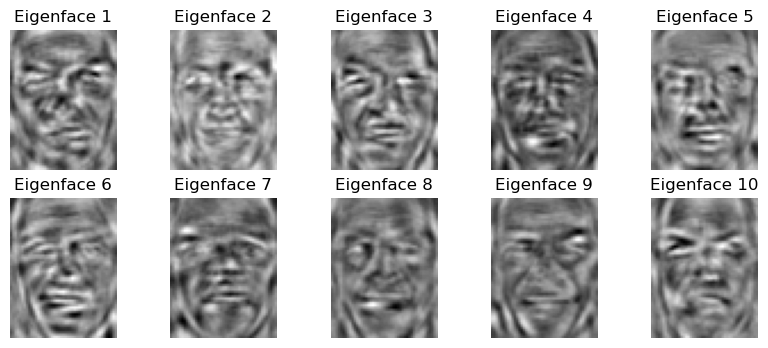

In [10]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=70)
X = lfw_dataset.data

# perform PCA on the dataset
pca = PCA(n_components=100)
transformed_X = pca.fit(X)

# plot the first 10 eigenfaces
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    eigenface = -pca.components_[i].reshape((62, 47))
    ax.imshow(eigenface, cmap='gray')
    ax.set_title('Eigenface {}'.format(i+1))
    ax.axis('off')
plt.show()

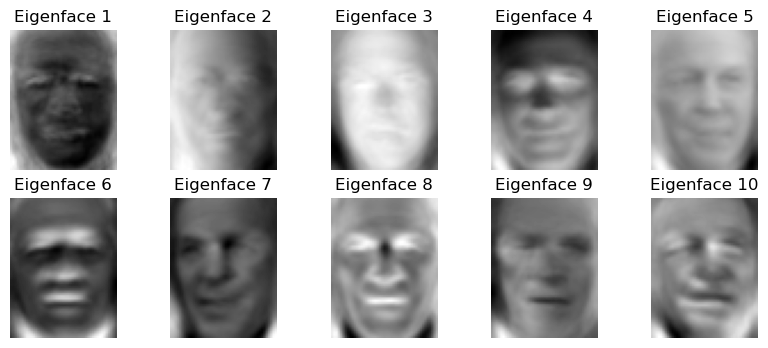

In [11]:
from sklearn.decomposition import PCA

# load the LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=70)
X = lfw_dataset.data

# perform PCA on the dataset
pca = PCA(n_components=100)
pca.fit(X)

# plot the first 10 eigenfaces
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape((62, 47)), cmap='gray')
    ax.set_title('Eigenface {}'.format(i+1))
    ax.axis('off')
plt.show()